# Vou utilizar alguns indices junto com o valor da moeda para fazer a previsão

Indices iniciais para teste:

- Nasdaq Crypto Index - OK
- Crypto Fear & Greed Index - OK
- CRYPTO 10 INDEX - NOK 
- Fear & Greed Index - NOK
- Nasdaq index - OK
- World Uncertainty Index - WUI - NOK
- Crypto Volatility Index (CVI) - NOK
- CBOE Volatility Index - VIX - OK
- Total Crypto Market Capitalization
- Crypto Adoption Index by Chainalysis - NOK
- Altcoin Index (Altcoin Market Cap) - NOK

- BITCOIN
  

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

## Bitcoin

In [6]:
btc_data = yf.download('BTC-USD', start=None, end=None)


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'BTC Price'}, xlabel='Date'>

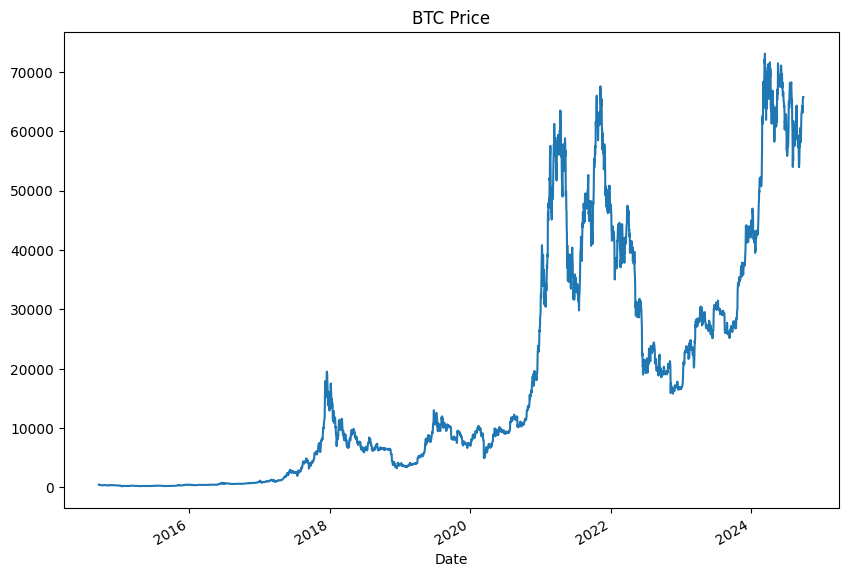

In [7]:
btc_data['Close'].plot(title='BTC Price', figsize=(10, 7))

## Nasdaq Crypto Index e Nasdaq Index

In [8]:
nasdaq_data = yf.download('NDAQ', start=None, end=None)


[*********************100%***********************]  1 of 1 completed


In [9]:
nasdaq_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.000000,5.000000,5.000000,5.000000,4.078877,3900
2002-07-02,5.166667,5.500000,5.000000,5.043333,4.114227,21000
2002-07-03,4.666667,5.333333,4.666667,5.000000,4.078877,30600
2002-07-05,5.000000,5.000000,5.000000,5.000000,4.078877,1500
2002-07-08,4.666667,4.666667,4.666667,4.666667,3.806953,900
...,...,...,...,...,...,...
2024-09-23,74.709999,74.879997,73.889999,74.010002,74.010002,2546000
2024-09-24,73.870003,73.870003,73.139999,73.669998,73.669998,2408200
2024-09-25,73.669998,73.940002,72.680000,73.040001,73.040001,3428900


In [10]:
nasdaq_crypto_data = yf.download('HASH11.SA', start=None, end=None)

[*********************100%***********************]  1 of 1 completed


In [11]:
nasdaq_crypto_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-26,52.000000,56.700001,49.849998,53.099998,53.099998,3097359
2021-04-27,54.450001,58.000000,50.779999,51.660000,51.660000,2765371
2021-04-28,51.700001,51.980000,50.500000,51.599998,51.599998,814484
2021-04-29,51.290001,51.290001,49.450001,49.450001,49.450001,934530
2021-04-30,50.529999,53.000000,50.060001,52.650002,52.650002,733115
...,...,...,...,...,...,...
2024-09-23,50.349998,50.889999,50.099998,50.360001,50.360001,353216
2024-09-24,50.220001,50.320000,49.189999,49.849998,49.849998,348273
2024-09-25,49.970001,50.270000,49.400002,49.500000,49.500000,238985


## Crypto Fear & Greed Index

In [12]:
import requests

dias = 1490

url = f"https://api.alternative.me/fng/?limit={dias}&date_format=world"
response = requests.get(url)
data = response.json()

print(data['data']) 


[{'value': '63', 'value_classification': 'Greed', 'timestamp': '29-09-2024', 'time_until_update': '-1727487337'}, {'value': '64', 'value_classification': 'Greed', 'timestamp': '28-09-2024'}, {'value': '61', 'value_classification': 'Greed', 'timestamp': '27-09-2024'}, {'value': '50', 'value_classification': 'Neutral', 'timestamp': '26-09-2024'}, {'value': '59', 'value_classification': 'Greed', 'timestamp': '25-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '24-09-2024'}, {'value': '50', 'value_classification': 'Neutral', 'timestamp': '23-09-2024'}, {'value': '52', 'value_classification': 'Neutral', 'timestamp': '22-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '21-09-2024'}, {'value': '54', 'value_classification': 'Neutral', 'timestamp': '20-09-2024'}, {'value': '49', 'value_classification': 'Neutral', 'timestamp': '19-09-2024'}, {'value': '45', 'value_classification': 'Fear', 'timestamp': '18-09-2024'}, {'value': '33', 'value_cla

In [13]:
# Transformar em df

crypto_fear_greed_index = pd.DataFrame(data['data'])

In [14]:
crypto_fear_greed_index.drop('time_until_update', axis=1, inplace=True)

In [15]:
crypto_fear_greed_index

,value,value_classification,timestamp
0,63,Greed,29-09-2024
1,64,Greed,28-09-2024
2,61,Greed,27-09-2024
3,50,Neutral,26-09-2024
4,59,Greed,25-09-2024
...,...,...,...
1485,41,Fear,05-09-2020
1486,40,Fear,04-09-2020
1487,79,Extreme Greed,03-09-2020
1488,83,Extreme Greed,02-09-2020


In [16]:
crypto_fear_greed_index.columns = ['Value', 'Value_categorical', 'Date']

In [17]:
crypto_fear_greed_index

,Value,Value_categorical,Date
0,63,Greed,29-09-2024
1,64,Greed,28-09-2024
2,61,Greed,27-09-2024
3,50,Neutral,26-09-2024
4,59,Greed,25-09-2024
...,...,...,...
1485,41,Fear,05-09-2020
1486,40,Fear,04-09-2020
1487,79,Extreme Greed,03-09-2020
1488,83,Extreme Greed,02-09-2020


In [18]:
# Trasnformar a coluna de date no index

crypto_fear_greed_index['Date'] = pd.to_datetime(crypto_fear_greed_index['Date'])

crypto_fear_greed_index.set_index('Date', inplace=True)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_11740\2125246770.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crypto_fear_greed_index['Date'] = pd.to_datetime(crypto_fear_greed_index['Date'])


In [19]:
crypto_fear_greed_index['Value'] = pd.to_numeric(crypto_fear_greed_index['Value'])

In [20]:
crypto_fear_greed_index

,Value,Value_categorical
Date,,
2024-09-29,63,Greed
2024-09-28,64,Greed
2024-09-27,61,Greed
2024-09-26,50,Neutral
2024-09-25,59,Greed
...,...,...
2020-09-05,41,Fear
2020-09-04,40,Fear
2020-09-03,79,Extreme Greed


## BOE Volatility Index

In [21]:
# VIX
vix_index = yf.download('^VIX', start=None, end=None)

vix_index


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2024-09-23,16.709999,16.950001,15.750000,15.890000,15.890000,0
2024-09-24,15.870000,16.670000,15.270000,15.390000,15.390000,0
2024-09-25,15.820000,15.820000,15.170000,15.410000,15.410000,0


## Solana Data

In [6]:
sol_data = yf.download('SOL-USD', start=None, end=None)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SOL-USD']: OperationalError('disk I/O error')


In [23]:
sol_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...
2024-09-24,144.814987,153.536285,143.304138,152.892151,152.892151,2927238360
2024-09-25,152.890961,153.547638,147.450134,148.023422,148.023422,2138602628
2024-09-26,148.021103,157.858154,146.870758,155.576096,155.576096,3009969111


# Analise de dados geral

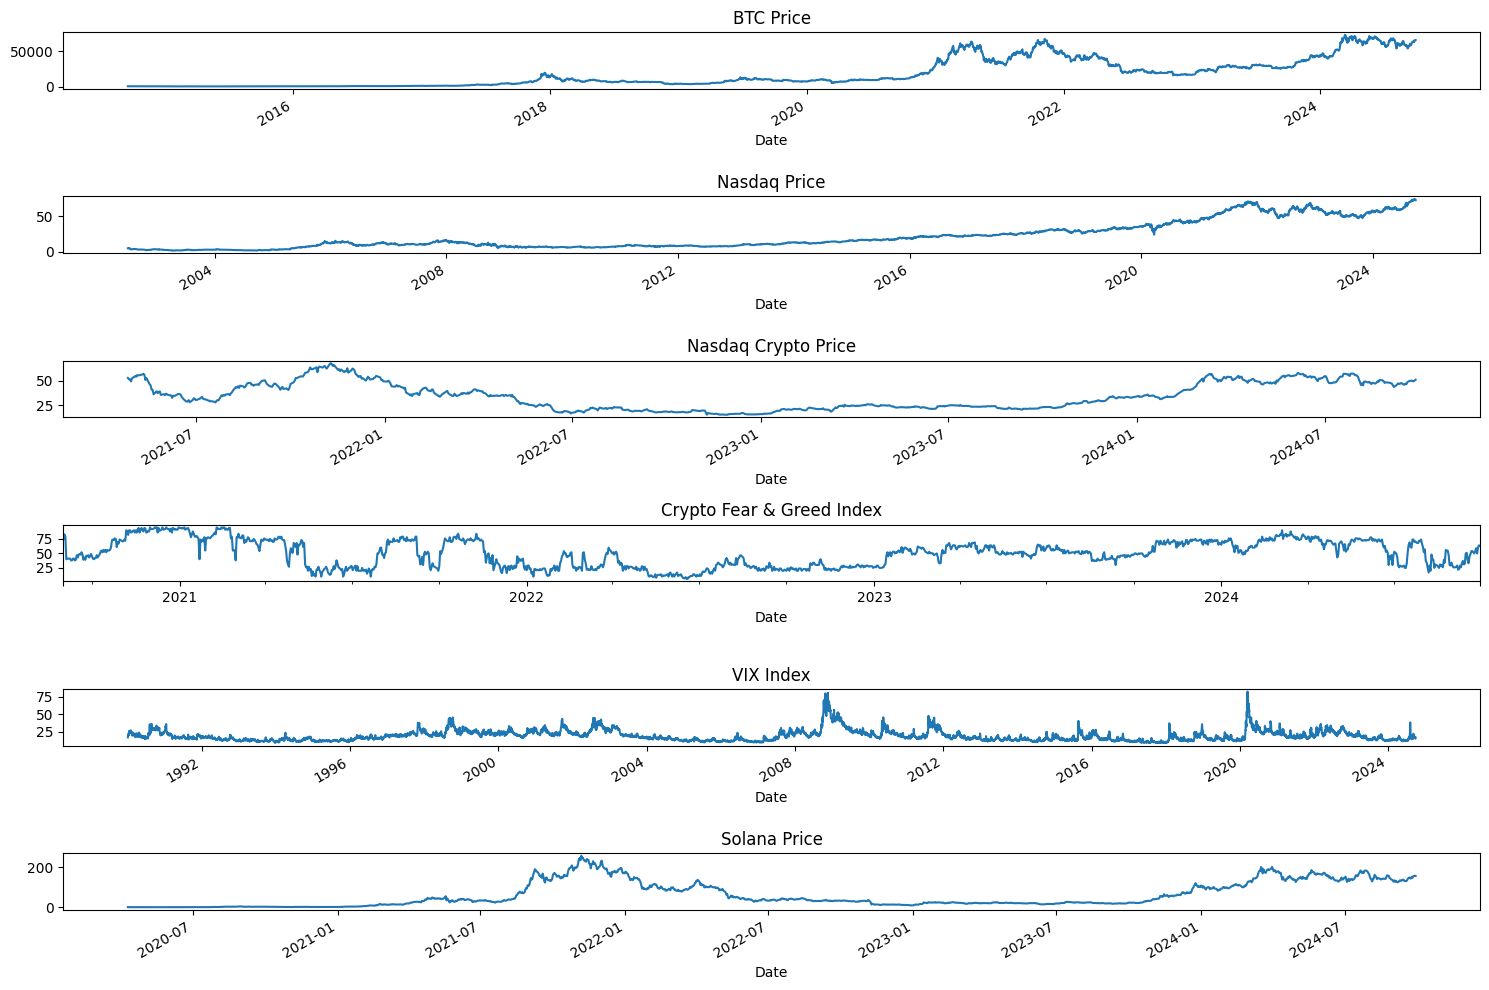

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 1, figsize=(15, 10)) # linha, coluna -> 6 graficos um de baixo do outro

btc_data['Close'].plot(title='BTC Price', ax=ax[0]) # ax[0] -> primeiro grafico
nasdaq_data['Close'].plot(title='Nasdaq Price', ax=ax[1])
nasdaq_crypto_data['Close'].plot(title='Nasdaq Crypto Price', ax=ax[2])
crypto_fear_greed_index['Value'].plot(title='Crypto Fear & Greed Index', ax=ax[3])
vix_index['Close'].plot(title='VIX Index', ax=ax[4])
sol_data['Close'].plot(title='Solana Price', ax=ax[5])

plt.tight_layout()
plt.show()

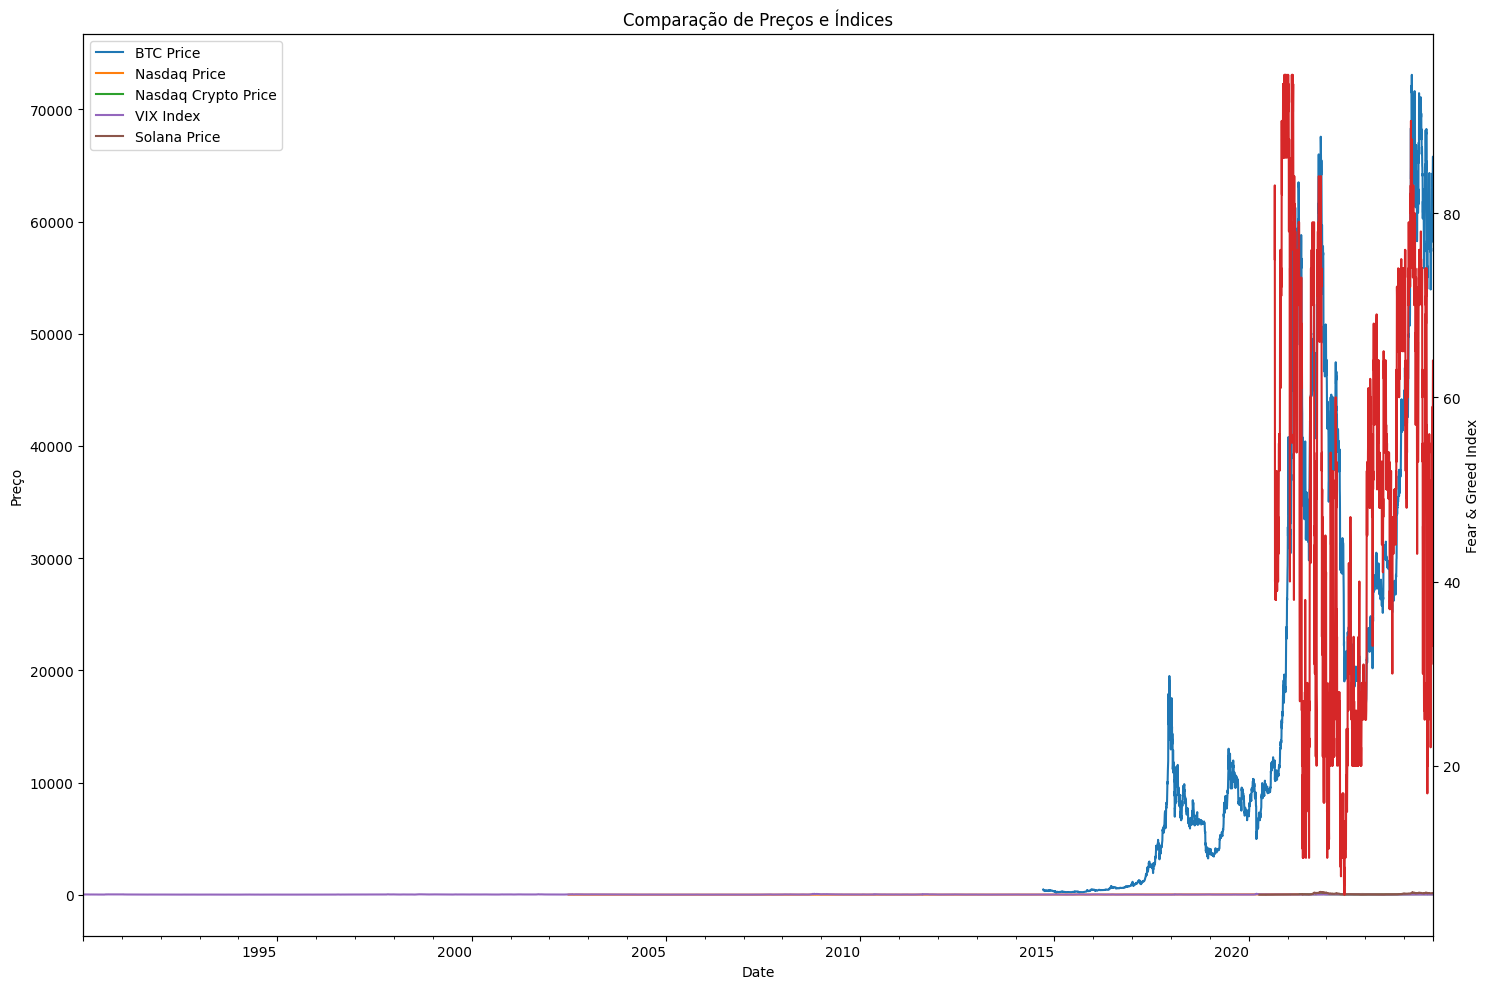

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

btc_data['Close'].plot(ax=ax, label='BTC Price')
nasdaq_data['Close'].plot(ax=ax, label='Nasdaq Price')
nasdaq_crypto_data['Close'].plot(ax=ax, label='Nasdaq Crypto Price')
crypto_fear_greed_index['Value'].plot(ax=ax, label='Crypto Fear & Greed Index', secondary_y=True)
vix_index['Close'].plot(ax=ax, label='VIX Index')
sol_data['Close'].plot(ax=ax, label='Solana Price')

ax.set_title('Comparação de Preços e Índices')
ax.set_ylabel('Preço')
ax.right_ax.set_ylabel('Fear & Greed Index')

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


Limitar dados a partir de 2020

In [26]:
btc_data = btc_data.loc[btc_data.index.year >= 2020]
nasdaq_data = nasdaq_data.loc[nasdaq_data.index.year >= 2020]
nasdaq_crypto_data = nasdaq_crypto_data.loc[nasdaq_crypto_data.index.year >= 2020]
crypto_fear_greed_index = crypto_fear_greed_index.loc[crypto_fear_greed_index.index.year >= 2020]
vix_index = vix_index.loc[vix_index.index.year >= 2020]
sol_data = sol_data.loc[sol_data.index.year >= 2020]





In [27]:
# # Normalizasr todos os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

btc_data['Close'] = scaler.fit_transform(btc_data[['Close']])
nasdaq_data['Close'] = scaler.fit_transform(nasdaq_data[['Close']])
nasdaq_crypto_data['Close'] = scaler.fit_transform(nasdaq_crypto_data[['Close']])
crypto_fear_greed_index['Value'] = scaler.fit_transform(crypto_fear_greed_index[['Value']])
vix_index['Close'] = scaler.fit_transform(vix_index[['Close']])
sol_data['Close'] = scaler.fit_transform(sol_data[['Close']])


C:\Users\Inteli\AppData\Local\Temp\ipykernel_11740\1432363865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_data['Close'] = scaler.fit_transform(nasdaq_data[['Close']])
C:\Users\Inteli\AppData\Local\Temp\ipykernel_11740\1432363865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_index['Close'] = scaler.fit_transform(vix_index[['Close']])


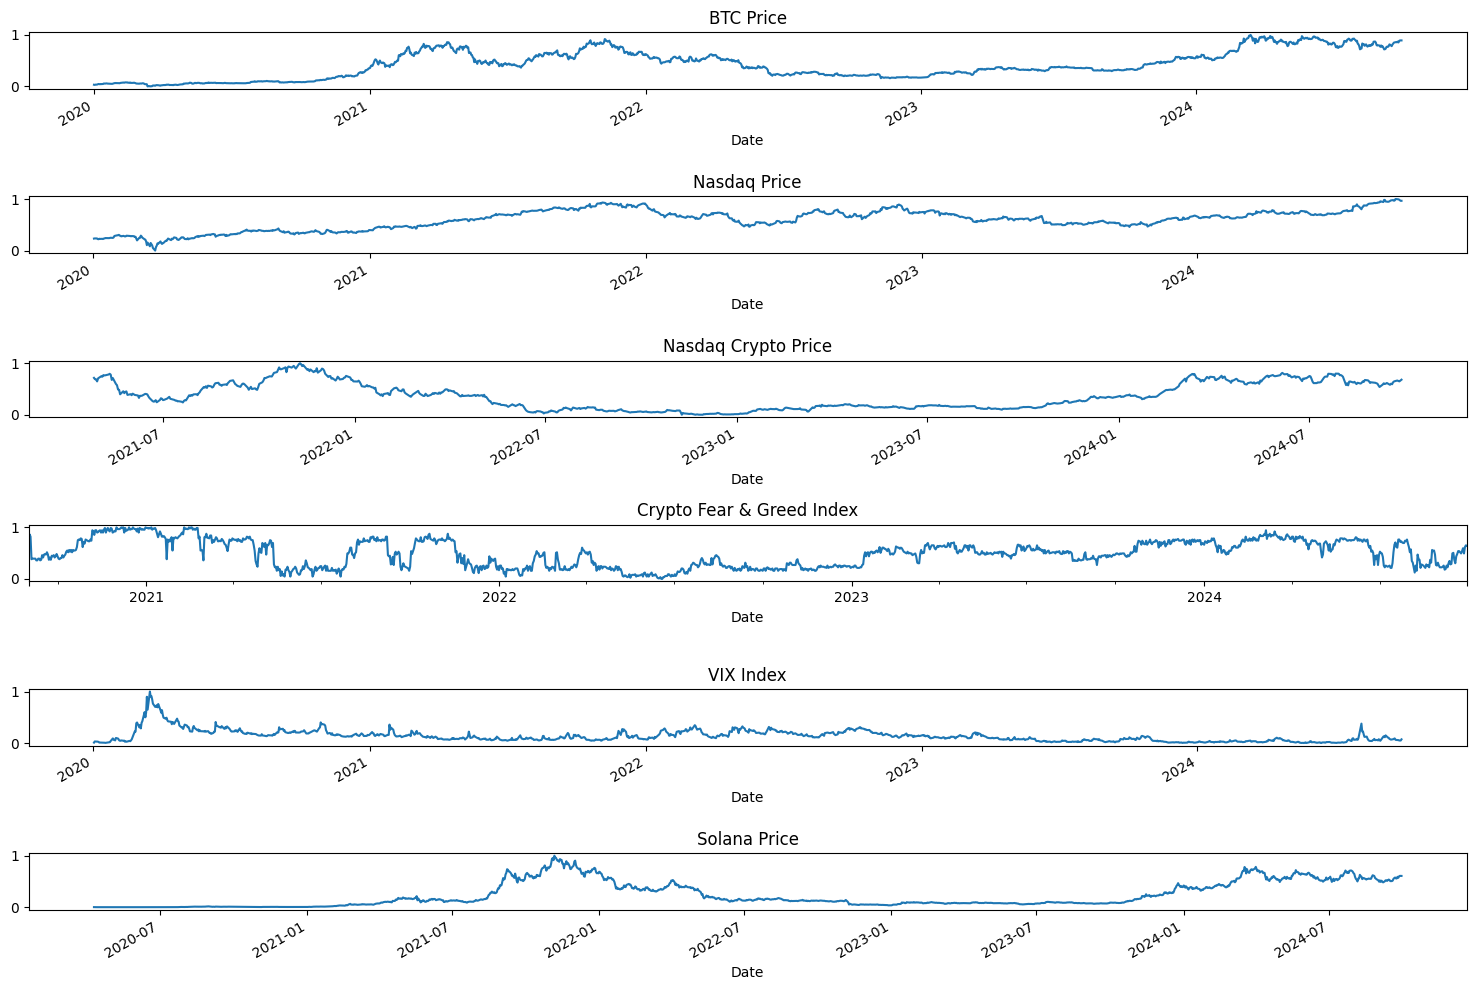

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 1, figsize=(15, 10)) # linha, coluna -> 6 graficos um de baixo do outro

btc_data['Close'].plot(title='BTC Price', ax=ax[0]) # ax[0] -> primeiro grafico
nasdaq_data['Close'].plot(title='Nasdaq Price', ax=ax[1])
nasdaq_crypto_data['Close'].plot(title='Nasdaq Crypto Price', ax=ax[2])
crypto_fear_greed_index['Value'].plot(title='Crypto Fear & Greed Index', ax=ax[3])
vix_index['Close'].plot(title='VIX Index', ax=ax[4])
sol_data['Close'].plot(title='Solana Price', ax=ax[5])

plt.tight_layout()
plt.show()

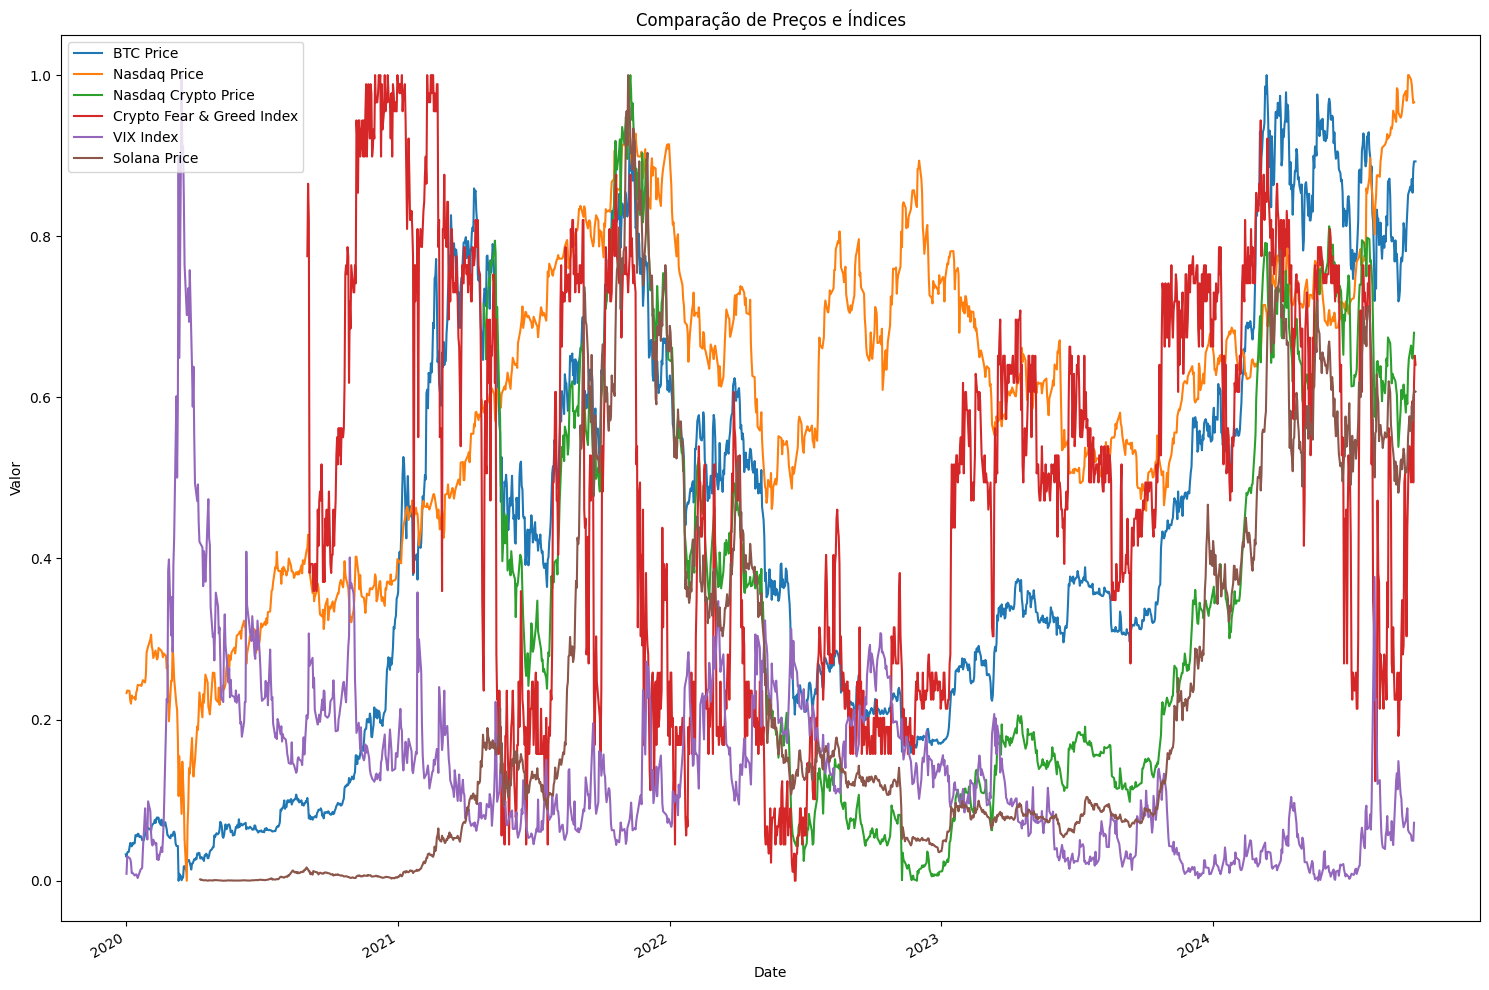

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

btc_data['Close'].plot(ax=ax, label='BTC Price')
nasdaq_data['Close'].plot(ax=ax, label='Nasdaq Price')
nasdaq_crypto_data['Close'].plot(ax=ax, label='Nasdaq Crypto Price')
crypto_fear_greed_index['Value'].plot(ax=ax, label='Crypto Fear & Greed Index')
vix_index['Close'].plot(ax=ax, label='VIX Index')
sol_data['Close'].plot(ax=ax, label='Solana Price')

ax.set_title('Comparação de Preços e Índices')
ax.set_ylabel('Valor')

ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [30]:
correlation_matrix = pd.DataFrame({
    'BTC Price': btc_data['Close'],
    'Nasdaq Price': nasdaq_data['Close'],
    'Nasdaq Crypto Price': nasdaq_crypto_data['Close'],
    'Crypto Fear & Greed Index': crypto_fear_greed_index['Value'],
    'VIX Index': vix_index['Close'],
    'Solana Price': sol_data['Close']
}).corr()

correlation_matrix

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
BTC Price,1.000000,0.668597,0.955481,0.330785,-0.509690,0.810381
Nasdaq Price,0.668597,1.000000,0.541948,-0.277102,-0.493681,0.715731
Nasdaq Crypto Price,0.955481,0.541948,1.000000,0.406867,-0.323615,0.904347
Crypto Fear & Greed Index,0.330785,-0.277102,0.406867,1.000000,-0.382641,0.047230
VIX Index,-0.509690,-0.493681,-0.323615,-0.382641,1.000000,-0.387028
Solana Price,0.810381,0.715731,0.904347,0.047230,-0.387028,1.000000


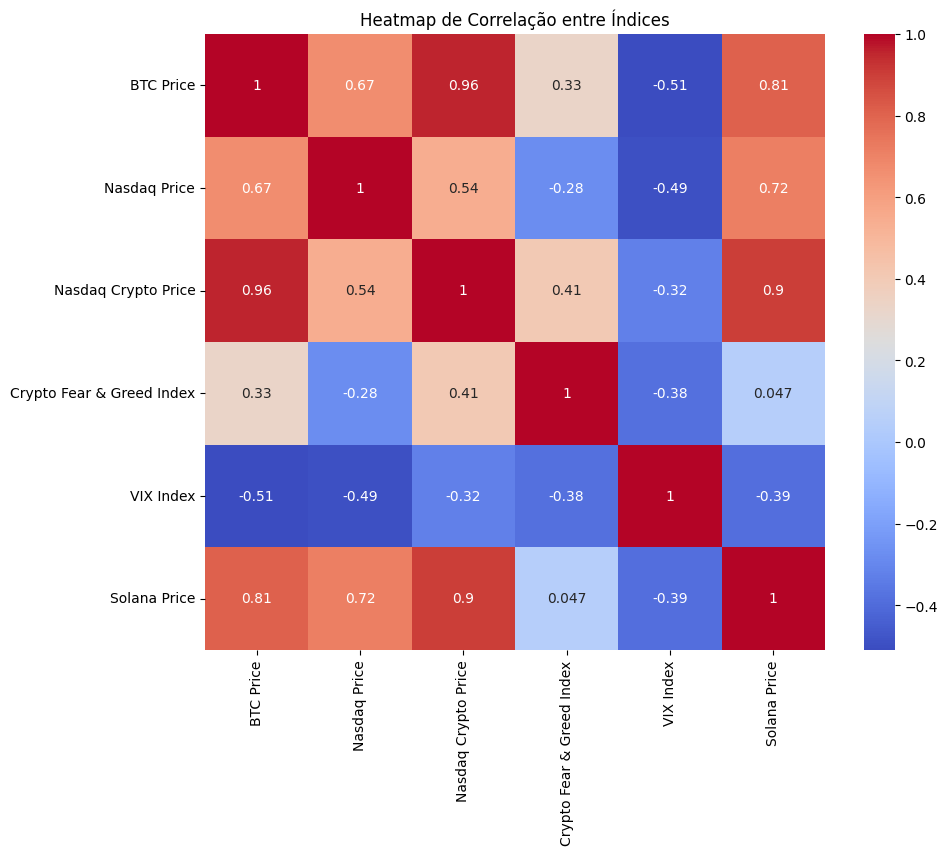

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlação entre Índices")
plt.show()


In [32]:
btc_data[btc_data['Close'] < 0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
sol_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_btc = seasonal_decompose(sol_data['Close'], model='additive', period=30)

fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decompose_btc.observed.plot(ax=axes[0], title='Observado')
decompose_btc.trend.plot(ax=axes[1], title='Tendência')
decompose_btc.seasonal.plot(ax=axes[2], title='Sazonalidade')
decompose_btc.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()
plt.show()



ValueError: x must have 2 complete cycles requires 60 observations. x only has 0 observation(s)

# Preparação dos dados para o modelo

In [34]:
# Criar df com toodos os dados e  o date como index

df_feat = pd.DataFrame({
    'BTC Price': btc_data['Close'],
    'Nasdaq Price': nasdaq_data['Close'],
    'Nasdaq Crypto Price': nasdaq_crypto_data['Close'],
    'Crypto Fear & Greed Index': crypto_fear_greed_index['Value'],
    'VIX Index': vix_index['Close'],
    'Solana Price': sol_data['Close']
})

In [35]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2020-01-01,0.032731,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.029579,0.233051,NaN,NaN,0.008612,NaN
2020-01-03,0.034855,0.236118,NaN,NaN,0.030496,NaN
2020-01-04,0.035821,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.035831,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036
2024-09-27,0.892930,0.966202,0.680240,0.617978,0.072003,0.608448


In [36]:
print(sol_data.index.min())
print(btc_data.index.min())
print(nasdaq_data.index.min())
print(nasdaq_crypto_data.index.min())
print(crypto_fear_greed_index.index.min())
print(vix_index.index.min())


2020-04-10 00:00:00
2020-01-01 00:00:00
2020-01-02 00:00:00
2021-04-26 00:00:00
2020-09-01 00:00:00
2020-01-02 00:00:00


In [37]:
# Filtrar todos os dados para começar a data 2021-04-26

sol_data = sol_data.loc[sol_data.index >= '2021-04-26']
btc_data = btc_data.loc[btc_data.index >= '2021-04-26']
nasdaq_data = nasdaq_data.loc[nasdaq_data.index >= '2021-04-26']
nasdaq_crypto_data = nasdaq_crypto_data.loc[nasdaq_crypto_data.index >= '2021-04-26']
crypto_fear_greed_index = crypto_fear_greed_index.loc[crypto_fear_greed_index.index >= '2021-04-26']
vix_index = vix_index.loc[vix_index.index >= '2021-04-26']


In [38]:
print(sol_data.index.min())
print(btc_data.index.min())
print(nasdaq_data.index.min())
print(nasdaq_crypto_data.index.min())
print(crypto_fear_greed_index.index.min())
print(vix_index.index.min())

2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00
2021-04-26 00:00:00


In [39]:
df_feat = pd.DataFrame({
    'BTC Price': btc_data['Close'],
    'Nasdaq Price': nasdaq_data['Close'],
    'Nasdaq Crypto Price': nasdaq_crypto_data['Close'],
    'Crypto Fear & Greed Index': crypto_fear_greed_index['Value'],
    'VIX Index': vix_index['Close'],
    'Solana Price': sol_data['Close']
})

# df_feat = pd.concat([btc_data['Close'], nasdaq_data['Close'], nasdaq_crypto_data['Close'],
#                      crypto_fear_greed_index['Value'], vix_index['Close'], sol_data['Close']], axis=1)

# df_feat.columns = ['BTC Price', 'Nasdaq Price', 'Nasdaq Crypto Price', 'Crypto Fear & Greed Index', 'VIX Index', 'Solana Price']

print(df_feat.isnull().sum())


BTC Price                      1
Nasdaq Price                 390
Nasdaq Crypto Price          394
Crypto Fear & Greed Index      0
VIX Index                    390
Solana Price                   1
dtype: int64


In [40]:
missing_data = df_feat[df_feat.isnull().any(axis=1)]

missing_data

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-05-01,0.776026,NaN,NaN,0.696629,NaN,0.189586
2021-05-02,0.758453,NaN,NaN,0.674157,NaN,0.179459
2021-05-08,0.790352,NaN,NaN,0.685393,NaN,0.174315
2021-05-09,0.781962,NaN,NaN,0.752809,NaN,0.169550
2021-05-15,0.613533,NaN,NaN,0.235955,NaN,0.166188
...,...,...,...,...,...,...
2024-09-15,0.795917,NaN,NaN,0.505618,NaN,0.506867
2024-09-21,0.857755,NaN,NaN,0.539326,NaN,0.576628
2024-09-22,0.861483,NaN,NaN,0.516854,NaN,0.558350


In [41]:
nasdaq_crypto_data.loc['2021-04-27']

Open         5.445000e+01
High         5.800000e+01
Low          5.078000e+01
Close        6.886846e-01
Adj Close    5.166000e+01
Volume       2.765371e+06
Name: 2021-04-27 00:00:00, dtype: float64

In [42]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036
2024-09-27,0.892930,0.966202,0.680240,0.617978,0.072003,0.608448


In [43]:
df_feat = df_feat.iloc[:-1]

In [44]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-24,0.871074,0.987601,0.654719,0.539326,0.049838,0.589650
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036


In [45]:
nasdaq_missing_days = pd.date_range(start=nasdaq_data.index.min(), 
                                    end=nasdaq_data.index.max()).difference(nasdaq_data.index)
nasdaq_missing_days

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-08', '2021-05-09',
               '2021-05-15', '2021-05-16', '2021-05-22', '2021-05-23',
               '2021-05-29', '2021-05-30',
               ...
               '2024-08-25', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-07', '2024-09-08', '2024-09-14', '2024-09-15',
               '2024-09-21', '2024-09-22'],
              dtype='datetime64[ns]', length=388, freq=None)

!!!! PROBLEMA: Os indices são calculados apenas em dias uteis, fazendo com que finais de semana e feriados fiquem sem dados !!!!

In [46]:
print(nasdaq_data.loc['2024-09-12'])
print(nasdaq_data.loc['2024-09-13'])
# print(nasdaq_data.loc['2024-09-14'])
# print(nasdaq_data.loc['2024-09-15'])
print(nasdaq_data.loc['2024-09-16'])
print(nasdaq_data.loc['2024-09-17'])

Open         7.225000e+01
High         7.268000e+01
Low          7.174000e+01
Close        9.656023e-01
Adj Close    7.233000e+01
Volume       2.852600e+06
Name: 2024-09-12 00:00:00, dtype: float64
Open         7.242000e+01
High         7.304000e+01
Low          7.223000e+01
Close        9.742017e-01
Adj Close    7.300000e+01
Volume       1.900400e+06
Name: 2024-09-13 00:00:00, dtype: float64
Open         7.329000e+01
High         7.369000e+01
Low          7.303000e+01
Close        9.802014e-01
Adj Close    7.330000e+01
Volume       2.260800e+06
Name: 2024-09-16 00:00:00, dtype: float64
Open         7.323000e+01
High         7.355000e+01
Low          7.203000e+01
Close        9.682020e-01
Adj Close    7.270000e+01
Volume       2.578800e+06
Name: 2024-09-17 00:00:00, dtype: float64


In [47]:
print(df_feat.loc['2024-09-12'])
print(df_feat.loc['2024-09-13'])
# print(nasdaq_data.loc['2024-09-14'])
# print(nasdaq_data.loc['2024-09-15'])
print(df_feat.loc['2024-09-16'])
print(df_feat.loc['2024-09-17'])

BTC Price                    0.780416
Nasdaq Price                 0.965602
Nasdaq Crypto Price          0.603115
Crypto Fear & Greed Index    0.280899
VIX Index                    0.073556
Solana Price                 0.524832
Name: 2024-09-12 00:00:00, dtype: float64
BTC Price                    0.816302
Nasdaq Price                 0.974202
Nasdaq Crypto Price          0.615875
Crypto Fear & Greed Index    0.292135
VIX Index                    0.066356
Solana Price                 0.536281
Name: 2024-09-13 00:00:00, dtype: float64
BTC Price                    0.781377
Nasdaq Price                 0.980201
Nasdaq Crypto Price          0.581160
Crypto Fear & Greed Index    0.370787
VIX Index                    0.074545
Solana Price                 0.506763
Name: 2024-09-16 00:00:00, dtype: float64
BTC Price                    0.812444
Nasdaq Price                 0.968202
Nasdaq Crypto Price          0.602927
Crypto Fear & Greed Index    0.303371
VIX Index                    0.081180


In [48]:
df_feat.isnull().sum()

BTC Price                      1
Nasdaq Price                 389
Nasdaq Crypto Price          393
Crypto Fear & Greed Index      0
VIX Index                    389
Solana Price                   1
dtype: int64

In [49]:
# Fazer o preenchimento dos valores faltantes de forma linear

df_feat = df_feat.interpolate(method='linear')

In [50]:
df_feat.isnull().sum()

BTC Price                    0
Nasdaq Price                 0
Nasdaq Crypto Price          0
Crypto Fear & Greed Index    0
VIX Index                    0
Solana Price                 0
dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

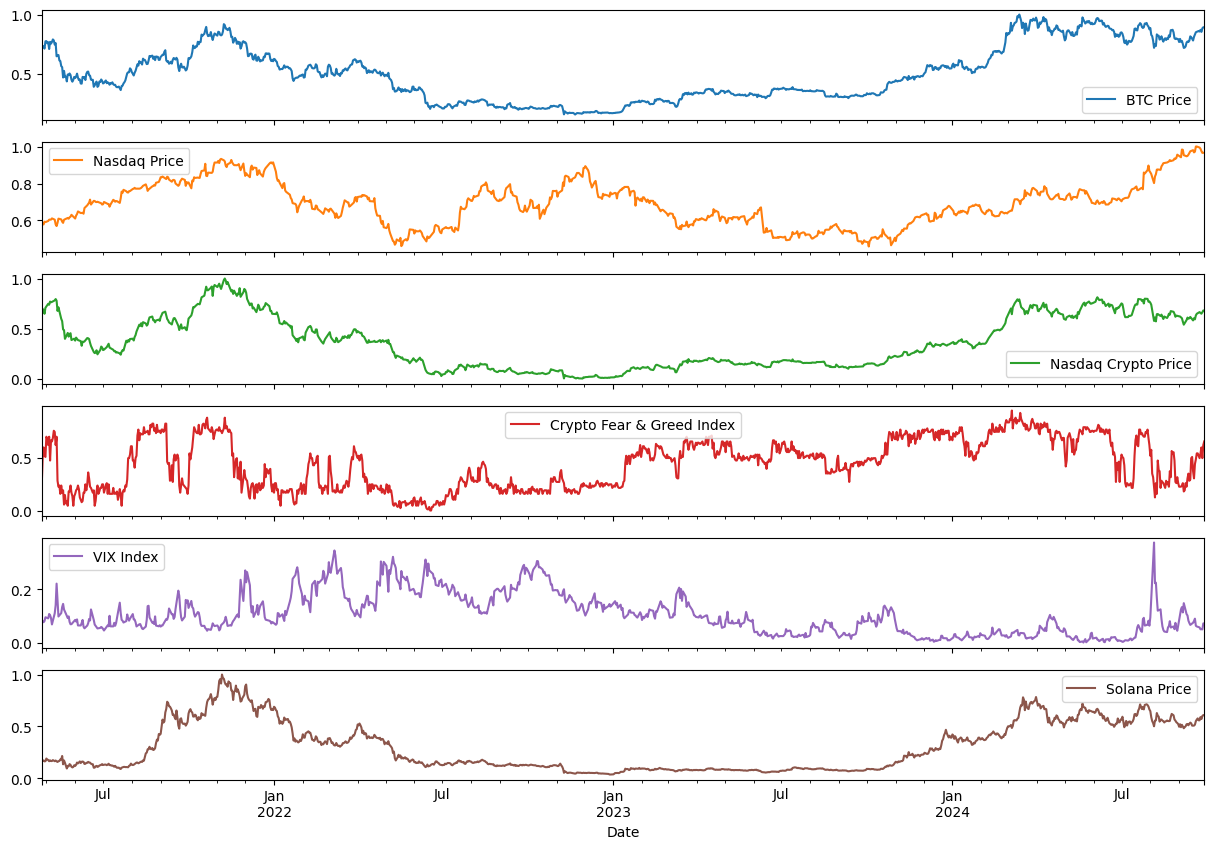

In [51]:
df_feat.plot(subplots=True, figsize=(15, 10))

É possivel ver que existe uma semelhaça entre os indices e moedas em alguns momentos.

In [52]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-24,0.871074,0.987601,0.654719,0.539326,0.049838,0.589650
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [59]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-24,0.871074,0.987601,0.654719,0.539326,0.049838,0.589650
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036


In [61]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-24,0.871074,0.987601,0.654719,0.539326,0.049838,0.589650
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036


# Modelo LSTM

In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Definir uma janela de tempo
def create_dataset(df, time_steps=3):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df.iloc[i:(i + time_steps)].values)
        y.append(df.iloc[i + time_steps, -1])
    return np.array(X), np.array(y)

# Parâmetros
time_steps = 60

# Preparar os dados
X, y = create_dataset(df_feat, time_steps)
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Construir o modelo LSTM
model = Sequential()

# Primeira camada LSTM com Dropout
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout de 20%

# Segunda camada LSTM
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Mais uma camada de Dropout para regularização

# Camada densa de saída
model.add(Dense(1))

# Compilando o modelo com um otimizador Adam com learning rate ajustado
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=5)


# Treinar o modelo com mais épocas e batch size ajustado
model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"Previsões: {y_pred}")


[[[0.72014407 0.5810946  0.71570648 0.23595506 0.08160383 0.16818127]
  [0.73499245 0.58622754 0.68868455 0.49438202 0.08047437 0.16532732]
  [0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  ...
  [0.40425453 0.70555293 0.2542691  0.04494382 0.06776789 0.10160467]
  [0.42212736 0.70061994 0.25877275 0.08988764 0.06296767 0.11428575]
  [0.43591935 0.69955334 0.28241697 0.17977528 0.05802627 0.1186668 ]]

 [[0.73499245 0.58622754 0.68868455 0.49438202 0.08047437 0.16532732]
  [0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  [0.71329301 0.59349375 0.64721337 0.51685393 0.0811803  0.16231492]
  ...
  [0.42212736 0.70061994 0.25877275 0.08988764 0.06296767 0.11428575]
  [0.43591935 0.69955334 0.28241697 0.17977528 0.05802627 0.1186668 ]
  [0.39151269 0.70135323 0.24188404 0.23595506 0.05308485 0.10906158]]

 [[0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  [0.71329301 0.59349375 0.64721337 0.51685393 0.0811803  0.16231492]
  [0

In [128]:
model.save('model_new_feat_lstm.h5')

In [129]:
y_pred

array([[0.38336563],
       [0.38219646],
       [0.37894216],
       [0.37543315],
       [0.37411574],
       [0.3761999 ],
       [0.3812548 ],
       [0.390032  ],
       [0.39985353],
       [0.40692416],
       [0.41427734],
       [0.42108986],
       [0.42920083],
       [0.4347032 ],
       [0.43649498],
       [0.4362155 ],
       [0.43624595],
       [0.4365354 ],
       [0.43490115],
       [0.4320402 ],
       [0.42727888],
       [0.42245865],
       [0.42068496],
       [0.42099753],
       [0.42634976],
       [0.43402308],
       [0.44835564],
       [0.46639058],
       [0.48582494],
       [0.502407  ],
       [0.5164702 ],
       [0.5294988 ],
       [0.5334921 ],
       [0.53598434],
       [0.5469536 ],
       [0.5602066 ],
       [0.57261884],
       [0.5820145 ],
       [0.59258515],
       [0.6027336 ],
       [0.61875737],
       [0.6402198 ],
       [0.6604197 ],
       [0.67445076],
       [0.6950175 ],
       [0.70890135],
       [0.70228857],
       [0.703

In [130]:
y_pred_inverse = scaler.inverse_transform(y_pred)

In [131]:
y_pred_inverse

array([[ 99.58426 ],
       [ 99.28212 ],
       [ 98.44115 ],
       [ 97.534355],
       [ 97.19391 ],
       [ 97.7325  ],
       [ 99.03878 ],
       [101.30698 ],
       [103.84505 ],
       [105.67223 ],
       [107.57243 ],
       [109.33292 ],
       [111.42895 ],
       [112.85087 ],
       [113.313896],
       [113.24167 ],
       [113.24954 ],
       [113.32434 ],
       [112.902016],
       [112.1627  ],
       [110.93228 ],
       [109.68664 ],
       [109.22829 ],
       [109.30906 ],
       [110.69218 ],
       [112.67511 ],
       [116.378914],
       [121.03949 ],
       [126.0617  ],
       [130.34682 ],
       [133.98102 ],
       [137.34785 ],
       [138.37979 ],
       [139.02383 ],
       [141.8585  ],
       [145.28334 ],
       [148.49089 ],
       [150.91891 ],
       [153.65057 ],
       [156.27313 ],
       [160.41397 ],
       [165.96027 ],
       [171.18031 ],
       [174.8062  ],
       [180.12105 ],
       [183.7089  ],
       [182.00002 ],
       [182.3

In [132]:
X

array([[[0.72014407, 0.5810946 , 0.71570648, 0.23595506, 0.08160383,
         0.16818127],
        [0.73499245, 0.58622754, 0.68868455, 0.49438202, 0.08047437,
         0.16532732],
        [0.73193261, 0.57856143, 0.68755861, 0.59550562, 0.07652126,
         0.17146844],
        ...,
        [0.40425453, 0.70555293, 0.2542691 , 0.04494382, 0.06776789,
         0.10160467],
        [0.42212736, 0.70061994, 0.25877275, 0.08988764, 0.06296767,
         0.11428575],
        [0.43591935, 0.69955334, 0.28241697, 0.17977528, 0.05802627,
         0.1186668 ]],

       [[0.73499245, 0.58622754, 0.68868455, 0.49438202, 0.08047437,
         0.16532732],
        [0.73193261, 0.57856143, 0.68755861, 0.59550562, 0.07652126,
         0.17146844],
        [0.71329301, 0.59349375, 0.64721337, 0.51685393, 0.0811803 ,
         0.16231492],
        ...,
        [0.42212736, 0.70061994, 0.25877275, 0.08988764, 0.06296767,
         0.11428575],
        [0.43591935, 0.69955334, 0.28241697, 0.17977528, 0.058

In [133]:
# Criar df com datas e previsões

dates = df_feat.index[-len(y_pred):]

predictions_df = pd.DataFrame({
    'Date': dates,
    'Predictions': y_pred_inverse.flatten()
})

predictions_df.set_index('Date', inplace=True)

predictions_df


,Predictions
Date,
2024-02-03,99.584259
2024-02-04,99.282120
2024-02-05,98.441147
2024-02-06,97.534355
2024-02-07,97.193909
...,...
2024-09-24,142.770721
2024-09-25,144.570450
2024-09-26,145.643738


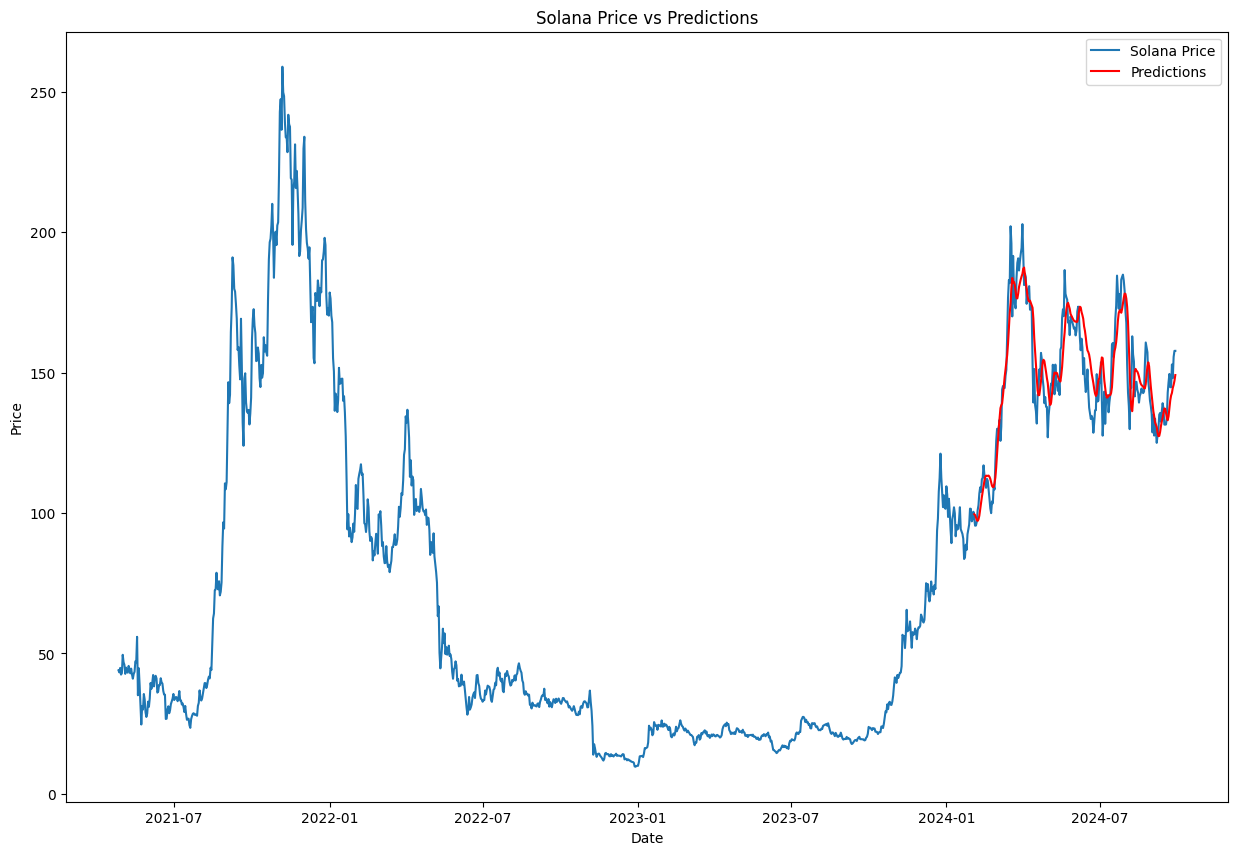

In [134]:
import matplotlib.pyplot as plt

# Assumindo que 'scaler' foi o mesmo que normalizou o 'Solana Price'
# Inversão dos valores normalizados para os reais
sol_real_prices_inversed = scaler.inverse_transform(df_feat[['Solana Price']].values)

# Plotar os dados reais e as previsões
plt.figure(figsize=(15, 10))

# Plotar o preço real da Solana
plt.plot(df_feat.index, sol_real_prices_inversed, label='Solana Price')

# Plotar as previsões
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predictions', color='red')

# Título e legendas
plt.title('Solana Price vs Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

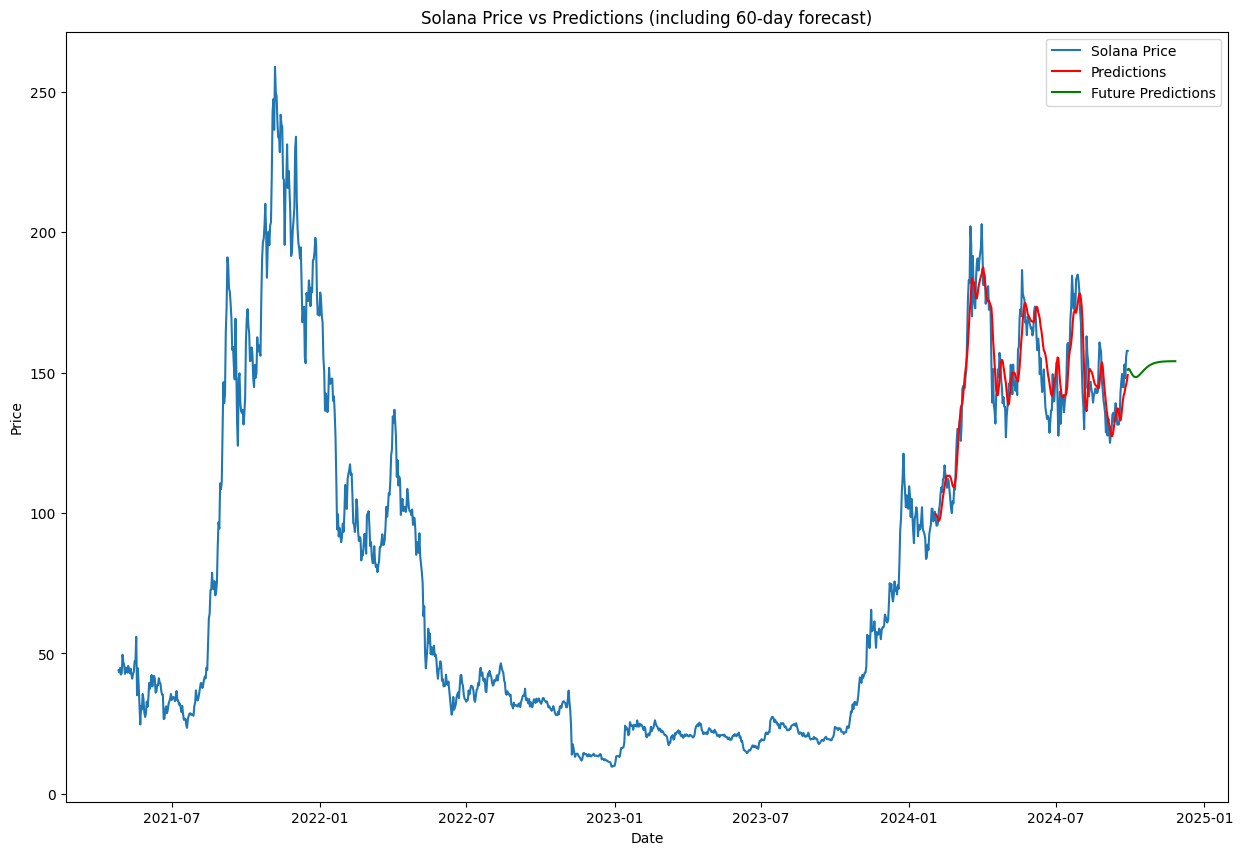

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de passos temporais (dias anteriores usados para previsão)
time_steps = 60
predictions_future = []

# Pegar os últimos time_steps dias do conjunto de dados para iniciar as previsões
last_sequence = df_feat[['BTC Price', 'Nasdaq Price', 'Nasdaq Crypto Price', 
                         'Crypto Fear & Greed Index', 'VIX Index', 'Solana Price']].values[-time_steps:]

# Fazer previsões para os próximos 60 dias
for i in range(60):
    # Ajustar a sequência para o formato esperado pelo modelo (batch_size=1)
    last_sequence_expanded = np.expand_dims(last_sequence, axis=0)
    
    # Prever o próximo valor
    predicted_price = model.predict(last_sequence_expanded)
    
    # Adicionar a previsão à lista
    predictions_future.append(predicted_price[0, 0])  # Previsão de Solana Price
    
    # Atualizar a sequência (remover o primeiro dia e adicionar a previsão no final)
    last_sequence = np.vstack([last_sequence[1:], np.concatenate([last_sequence[-1][:-1], predicted_price[0]])])

# Gerar DataFrame com as previsões futuras
future_dates = pd.date_range(df_feat.index[-1], periods=60, freq='D')
future_predictions_df = pd.DataFrame(predictions_future, index=future_dates, columns=['Future Predictions'])

# Plotar os dados reais e as previsões
plt.figure(figsize=(15, 10))

sol_real_prices_inversed = scaler.inverse_transform(df_feat[['Solana Price']].values)

plt.plot(df_feat.index, sol_real_prices_inversed, label='Solana Price')

sol_real_prices_inversed = scaler.inverse_transform(df_feat[['Solana Price']].values)


# Plotar as previsões anteriores
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predictions', color='red')

future__predictions_df_inversed = scaler.inverse_transform(future_predictions_df[['Future Predictions']].values)

# Plotar as previsões futuras
plt.plot(future_predictions_df.index, future__predictions_df_inversed, label='Future Predictions', color='green')

# Título e legendas
plt.title('Solana Price vs Predictions (including 60-day forecast)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()



In [117]:
future__predictions_df_inversed

array([[161.52666],
       [164.94748],
       [167.63304],
       [169.81807],
       [171.57222],
       [172.97867],
       [174.12103],
       [175.07298],
       [175.89284],
       [176.62358],
       [177.29375],
       [177.92055],
       [178.51253],
       [179.0726 ],
       [179.59972],
       [180.09131],
       [180.54442],
       [180.95642],
       [181.32573],
       [181.65204],
       [181.93628],
       [182.18047],
       [182.38744],
       [182.56061],
       [182.70389],
       [182.82103],
       [182.91592],
       [182.99219],
       [183.05318],
       [183.1018 ],
       [183.14056],
       [183.1714 ],
       [183.19603],
       [183.21576],
       [183.23163],
       [183.24445],
       [183.25488],
       [183.26344],
       [183.27052],
       [183.27643],
       [183.28122],
       [183.28522],
       [183.2884 ],
       [183.29099],
       [183.29308],
       [183.29477],
       [183.29597],
       [183.29678],
       [183.29735],
       [183.29774],


In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error

# Definir uma janela de tempo
def create_dataset(df, time_steps=60):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df.iloc[i:(i + time_steps)].values)
        y.append(df.iloc[i + time_steps, -1])
    return np.array(X), np.array(y)

# Parâmetros
time_steps = 60

# Preparar os dados
X, y = create_dataset(df_feat, time_steps)
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()

# Primeira camada GRU com Dropout
model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout de 20%

# Segunda camada GRU
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))  # Mais uma camada de Dropout

# Camada densa de saída
model.add(Dense(1))

# Compilando o modelo com otimizador Adam e taxa de aprendizado ajustada
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo com mais épocas e batch size ajustado
model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# Treinar o modelo
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=1)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"Previsões: {y_pred}")


[[[0.72014407 0.5810946  0.71570648 0.23595506 0.08160383 0.16818127]
  [0.73499245 0.58622754 0.68868455 0.49438202 0.08047437 0.16532732]
  [0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  ...
  [0.40425453 0.70555293 0.2542691  0.04494382 0.06776789 0.10160467]
  [0.42212736 0.70061994 0.25877275 0.08988764 0.06296767 0.11428575]
  [0.43591935 0.69955334 0.28241697 0.17977528 0.05802627 0.1186668 ]]

 [[0.73499245 0.58622754 0.68868455 0.49438202 0.08047437 0.16532732]
  [0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  [0.71329301 0.59349375 0.64721337 0.51685393 0.0811803  0.16231492]
  ...
  [0.42212736 0.70061994 0.25877275 0.08988764 0.06296767 0.11428575]
  [0.43591935 0.69955334 0.28241697 0.17977528 0.05802627 0.1186668 ]
  [0.39151269 0.70135323 0.24188404 0.23595506 0.05308485 0.10906158]]

 [[0.73193261 0.57856143 0.68755861 0.59550562 0.07652126 0.17146844]
  [0.71329301 0.59349375 0.64721337 0.51685393 0.0811803  0.16231492]
  [0

In [138]:
model.save('model_new_feat_gru.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

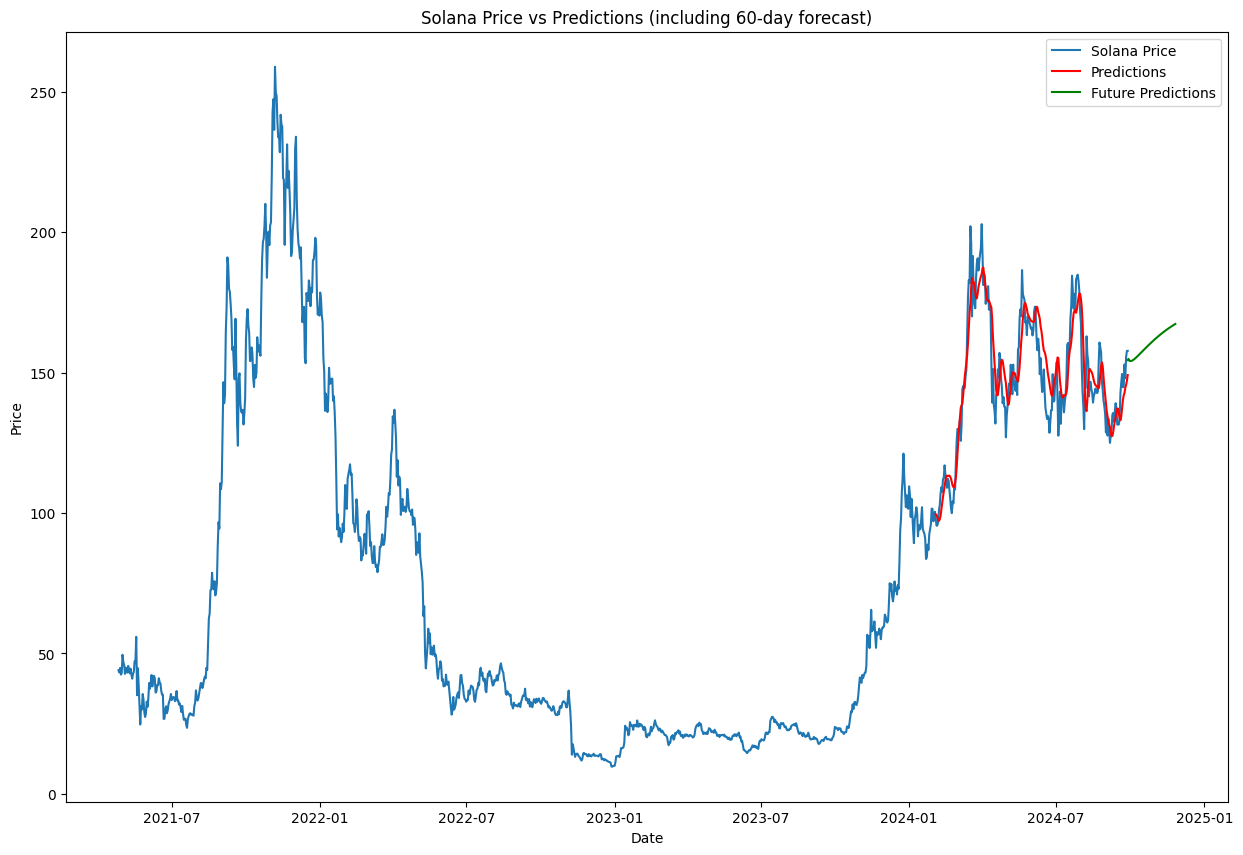

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de passos temporais (dias anteriores usados para previsão)
time_steps = 60
predictions_future = []

# Pegar os últimos time_steps dias do conjunto de dados para iniciar as previsões
last_sequence = df_feat[['BTC Price', 'Nasdaq Price', 'Nasdaq Crypto Price', 
                         'Crypto Fear & Greed Index', 'VIX Index', 'Solana Price']].values[-time_steps:]

# Fazer previsões para os próximos 60 dias
for i in range(60):
    # Ajustar a sequência para o formato esperado pelo modelo (batch_size=1)
    last_sequence_expanded = np.expand_dims(last_sequence, axis=0)
    
    # Prever o próximo valor
    predicted_price = model.predict(last_sequence_expanded)
    
    # Adicionar a previsão à lista
    predictions_future.append(predicted_price[0, 0])  # Previsão de Solana Price
    
    # Atualizar a sequência (remover o primeiro dia e adicionar a previsão no final)
    last_sequence = np.vstack([last_sequence[1:], np.concatenate([last_sequence[-1][:-1], predicted_price[0]])])

# Gerar DataFrame com as previsões futuras
future_dates = pd.date_range(df_feat.index[-1], periods=60, freq='D')
future_predictions_df = pd.DataFrame(predictions_future, index=future_dates, columns=['Future Predictions'])

# Plotar os dados reais e as previsões
plt.figure(figsize=(15, 10))

sol_real_prices_inversed = scaler.inverse_transform(df_feat[['Solana Price']].values)

plt.plot(df_feat.index, sol_real_prices_inversed, label='Solana Price')

sol_real_prices_inversed = scaler.inverse_transform(df_feat[['Solana Price']].values)


# Plotar as previsões anteriores
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predictions', color='red')

future__predictions_df_inversed = scaler.inverse_transform(future_predictions_df[['Future Predictions']].values)

# Plotar as previsões futuras
plt.plot(future_predictions_df.index, future__predictions_df_inversed, label='Future Predictions', color='green')

# Título e legendas
plt.title('Solana Price vs Predictions (including 60-day forecast)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()



In [140]:
df_feat.to_csv('df_feat.csv')

In [142]:
last_sequence

array([[0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59575772],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59736478],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59482467],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59441578],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59459102],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59476244],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59535909],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59608787],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59691525],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59784853],
       [0.89292988, 0.9662022 , 0.68024018, 0.65168539, 0.07200338,
        0.59883654],
       [0.89292988, 0

In [143]:
future_predictions_df

,Future Predictions
2024-09-28,0.595758
2024-09-29,0.597365
2024-09-30,0.594825
2024-10-01,0.594416
2024-10-02,0.594591
2024-10-03,0.594762
2024-10-04,0.595359
2024-10-05,0.596088
2024-10-06,0.596915
2024-10-07,0.597849


In [144]:
df_feat

,BTC Price,Nasdaq Price,Nasdaq Crypto Price,Crypto Fear & Greed Index,VIX Index,Solana Price
Date,,,,,,
2021-04-26,0.720144,0.581095,0.715706,0.235955,0.081604,0.168181
2021-04-27,0.734992,0.586228,0.688685,0.494382,0.080474,0.165327
2021-04-28,0.731933,0.578561,0.687559,0.595506,0.076521,0.171468
2021-04-29,0.713293,0.593494,0.647213,0.516854,0.081180,0.162315
2021-04-30,0.774883,0.591161,0.707262,0.505618,0.095299,0.164232
...,...,...,...,...,...,...
2024-09-24,0.871074,0.987601,0.654719,0.539326,0.049838,0.589650
2024-09-25,0.854060,0.975002,0.648152,0.595506,0.050120,0.570810
2024-09-26,0.883979,0.965402,0.662976,0.494382,0.049555,0.600036
